In [1]:
import numpy as np 
import scipy as sp 
from scipy.integrate import solve_ivp 
from scipy.optimize import minimize 
import matplotlib.pyplot as plt


We can state that the net force is 

$\begin{align}
\overrightarrow{F}_{net} = \overrightarrow{F}_g + \overrightarrow{F}_f = -mg \hat{y} - b| \overrightarrow{v}|\overrightarrow{v} 
\end{align}$

Recall that $\hat{v} = \dot x \hat{x} + \dot y \hat{y}$, and substituting this into our expression we get 

$\begin{align}
\overrightarrow{F}_{net} = -mg\hat{y} -b\sqrt{\dot x^2 + \dot y^2}(\dot x \hat{x} + \dot y \hat{y})
\end{align}$

Writing this in vector form, 

$\begin{align} 
\overrightarrow{F}_{net} = \begin{bmatrix} -b\sqrt{\dot x ^2 + \dot y^2}\dot x \\ -mg -b\sqrt{\dot x ^2 + \dot y^2}\dot y \end{bmatrix}
\end{align}$

We can use the notation for net force as 
$\overrightarrow{F}_{net} = m\overrightarrow{a} = m \braket{\ddot x, \ddot y}$

$\begin{align}
m \begin{bmatrix} \ddot x \\ \ddot y \end{bmatrix} = \begin{bmatrix} -b\sqrt{\dot x ^2 + \dot y^2}\dot x \\ -mg -b\sqrt{\dot x ^2 + \dot y^2}\dot y \end{bmatrix} 
\end{align}$

Solve to yield the differential equations 

$\begin{align}
\ddot x = -\dfrac{b}{m} \sqrt{\dot x^2 + \dot y^2}\dot x
\end{align}$

$\begin{align}
\ddot y = -g -\dfrac{b}{m} \sqrt{\dot x^2 + \dot y^2}\dot y
\end{align}$

We can define the following variables as $x' = x/g$ and $y' = y/g$

$\begin{align}
\ddot x' = -\dfrac{bg}{m} \sqrt{\dot x^2 + \dot y ^2} \dot x'
\end{align}$

$\begin{align}
\ddot y = -1 -\dfrac{bg}{m} \sqrt{\dot x^2 + \dot y^2} \dot y'
\end{align}$


We can replace $bg/m = B$ in order to solve these differential equations above.

$\begin{align} 
\ddot x' = -B \sqrt{\dot x^2 + \dot y^2} \dot x'
\end{align}$

$\begin{align}
\ddot y = -1 - B \sqrt{\dot x^2 + \dot y^2} \dot y'
\end{align}$

To simplify these expressions into a first order ODE, we can define $v_x = \dot x$ and $v_y = \dot y$, giving us 4 coupled first order ODE's.

$\begin{align}
\dot v_x = -B \sqrt{\dot x^2 + \dot y^2} \dot x
\end{align}$

$\begin{align}
\dot y = v_y
\end{align}$

$\begin{align}
\dot x = v_x
\end{align}$

$\begin{align}
\dot v_y = -B\sqrt{\dot x^2 + \dot y^2} \dot y
\end{align}$

We can then define a vector $\overrightarrow{S} = \biggl \langle x, v_x, y, v_y \biggr \rangle$. TO solve this ODE, we need to make a function that takes in $overrightarrow{S}$ and time $t$, and returns $d\overrightarrow{S}/dt$. We would want the following. 

$\begin{align}
\dfrac{d\overrightarrow{S}}{dt} = f(\overrightarrow{S}, t)
\end{align}$



In [2]:
#define the function above...
def dSdt(t, S, B):
    x, vx, y, vy = S 
    return [vx,
            -B *np.sqrt(vx**2+vy**2)*vx,
            vy,
            -1-B*np.sqrt(vx**2+vy**2)*vy]

Define friction $B$, initial velocity $V$, and angles $t1, t2, t3$

In [3]:
B = 1
V = 1
t1 = 40 *np.pi/180
t2 = 45 * np.pi/180
t3 = 50 *np.pi/180

Solve the ODE with "solve_ivp". The function $d\overrightarrow{S}/dt$ is taken in, and used to solve over the time interval of $[0, 2]$ seconds, initial conditions, $t_eval$ to evaluate on, and additional arguments $B$ for the function. We set 

In [4]:
sol1 = solve_ivp(dSdt, [0,2], y0=[0, V*np.cos(t1), 0, V*np.sin(t1)], t_eval=np.linspace(0,2,1000), args=(B,))
sol2 = solve_ivp(dSdt, [0,2], y0=[0, V*np.cos(t2), 0, V*np.sin(t2)], t_eval=np.linspace(0,2,1000), args=(B,))
sol3 = solve_ivp(dSdt, [0,2], y0=[0, V*np.cos(t3), 0, V*np.sin(t3)], t_eval=np.linspace(0,2,1000), args=(B,))

Plotting the solutions...

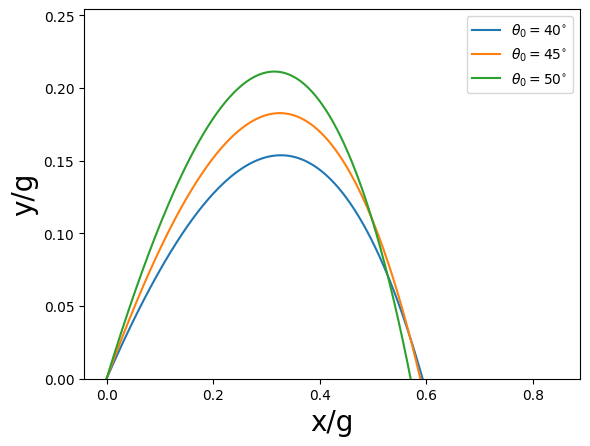

In [19]:
plt.plot(sol1.y[0],sol1.y[2], label=r'$\theta_0=40^{\circ}$')
plt.plot(sol2.y[0],sol2.y[2], label=r'$\theta_0=45^{\circ}$')
plt.plot(sol3.y[0],sol3.y[2], label=r'$\theta_0=50^{\circ}$')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('x/g', fontsize=20)
plt.ylabel('y/g', fontsize=20)
plt.show()

The function above described the $x/g$ distance which the projectile travels before it hits he ground, with an initial velocity of $V$. We can find this distance exactly for the three cases above. 

In [6]:
def get_distance(angle, B, V=1, t=2):
    v0x = V*np.cos(angle*np.pi/180)
    v0y = V*np.sin(angle*np.pi/180)
    sol = solve_ivp(dSdt, [0,t], y0=[0, v0x, 0, v0y], t_eval=np.linspace(0,t,10000), args=(B,), atol=1e-7, rtol=1e-4)
    just_above_idx = np.where(np.diff(np.sign(sol.y[2])) < 0)[0][0]
    just_below_idx = just_above_idx + 1
    x_loc = (sol.y[0][just_above_idx] + sol.y[0][just_below_idx])/2
    return x_loc

In [8]:
print(f'Launch angle 40 degrees distance travelled:     {get_distance(40, B=1, V=1)}')
print(f'Launch angle 45 degrees distance travelled:     {get_distance(45, B=1, V=1)}')
print(f'Launch angle 50 degrees distance travelled:     {get_distance(50, B=1, V=1)}')


Launch angle 40 degrees distance travelled:     0.5933703230246123
Launch angle 45 degrees distance travelled:     0.5890479196032461
Launch angle 50 degrees distance travelled:     0.5707816333141567


We can further break down these angles, going from 30 to 60, and say with 300 divisions. 

In [9]:
angles = np.linspace(30, 60, 300)
x_locs = np.vectorize(get_distance)(angles, B=1)

The code above keeps $V=1$ constant, while combing through the different and many angles. We can plot this. 

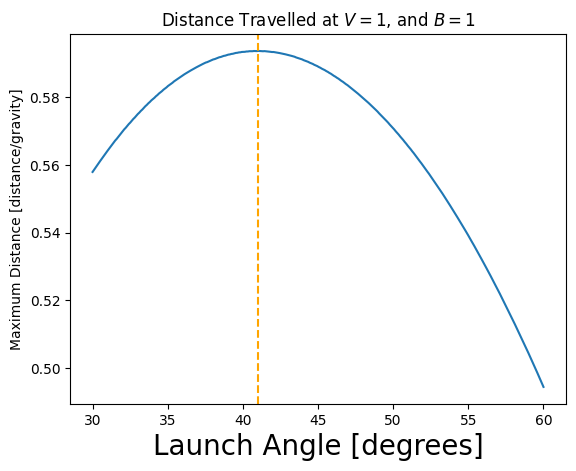

In [10]:
plt.plot(angles, x_locs)
plt.xlabel('Launch Angle [degrees]', fontsize=20)
plt.ylabel('Maximum Distance [distance/gravity]')
plt.axvline(angles[np.argmax(x_locs)], ls='--', color='orange')
plt.title('Distance Travelled at $V=1$, and $B=1$')
plt.show()

We can now try to find the angle which gives the maximum distance as a function of $B$. We will do this for $V=1$ and $V=2$. 

In [13]:
V1 = 1
V2 = 2
angles = np.linspace(35, 45, 200)
Bs = np.linspace(0, 1, 50)

results_v1 = [np.vectorize(get_distance)(angles, B=B, V=V1) for B in Bs]
opt_angles_v1 = [angles[np.argmax(result)] for result in results_v1]
results_v2 = [np.vectorize(get_distance)(angles, B=B, V=V2, t=6) for B in Bs]
opt_angles_v2 = [angles[np.argmax(result)] for result in results_v2]


Plotting the results...

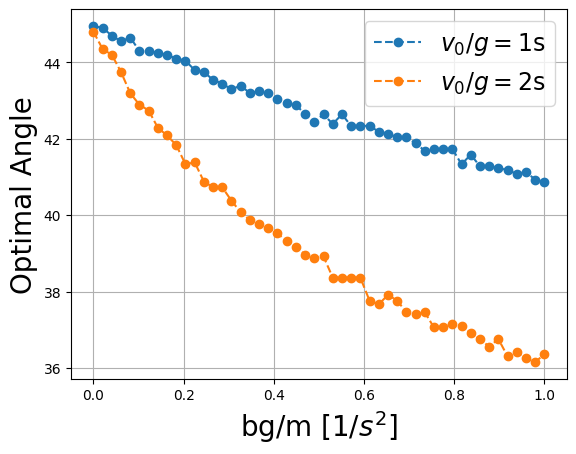

In [14]:
plt.plot(Bs, opt_angles_v1, 'o--', label='$v_0/g=1$s')
plt.plot(Bs, opt_angles_v2, 'o--', label='$v_0/g=2$s')
plt.legend(fontsize=17)
plt.xlabel('bg/m [1/$s^2$]', fontsize=20)
plt.ylabel('Optimal Angle', fontsize=20)
plt.grid()

So far we've analyzed a hypothetical scenario, but what about regular and real objects? We could examine a golf ball and a soccer ball. This makes $b = \dfrac{1}{2} \rho AC_d$.


- For a golfball, typical mass is $m = 0.046$ kg, a radius of $r = 0.021$ m, and assuming a professional hits this golfball, a $C_d$ value of $\approx 0.3$. 
- For a soccer ball, typical mass is $m = 0.430$ kg, a radius of $r = 0.11$ m, and a $C_d$ value of $\approx 0.25$. 
- For air, $\rho = 1.29$ kg/$m^3$

Sources are as follows...

https://www.grc.nasa.gov/www/k-12/airplane/socdrag.html 

https://us.select-sport.com/pages/size-chart-soccer-balls?srsltid=AfmBOopssofOFGYx5j2QiI4PIxNwXfOYUlor3cmmowWJ4UbnW6v8PnfO 

https://www.sportingbounce.com/blog/how-much-does-a-golf-ball-weigh 



We can write the formula for $B$ to be 

$\begin{align}
B = \dfrac{bg}{m} = \dfrac{1}{2} \dfrac{\rho \pi r^2 C_d g}{m}
\end{align}$

In [16]:
rho = 1.29
g = 9.81 

##GOLF 
r = 0.021 
Cd = 0.3 
m = 0.046 
B_golf = 0.5 * rho * np.pi * r**2 * Cd * g /m 

##SOCCER 
r = 0.11
Cd = 0.25 
m = 0.430
B_soccer = 0.5 * rho * np.pi * r**2 * Cd * g /m

Plot the results of the values of $B$ for both the soccer ball and golf ball. 

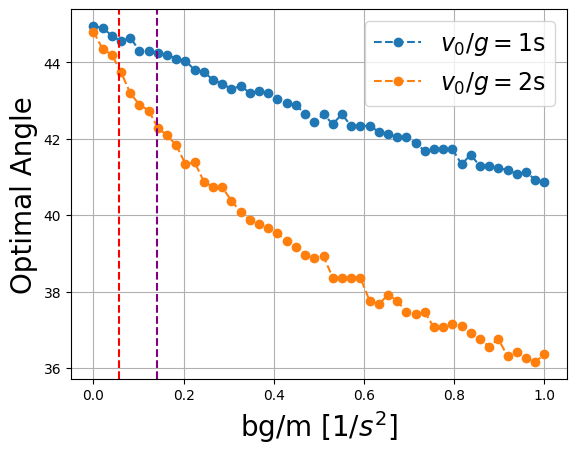

In [18]:
plt.plot(Bs, opt_angles_v1, 'o--', label='$v_0/g=1$s')
plt.plot(Bs, opt_angles_v2, 'o--', label='$v_0/g=2$s')
plt.legend(fontsize=17)
plt.xlabel('bg/m [1/$s^2$]', fontsize=20)
plt.ylabel('Optimal Angle', fontsize=20)
plt.grid()
plt.axvline(B_golf, ls='--', color='r')
plt.axvline(B_soccer, ls='--', color='purple')